In [52]:
import matplotlib

# temporary work around down to virtualenv
# matplotlib issue.
matplotlib.use('Agg')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LogisticRegression

# import specific projection format.
from fairml import audit_model
from fairml import plot_dependencies

import os 
import sys

%matplotlib inline

In [7]:
INPUT_DIR = '/working/input'

In [18]:
df = pd.read_csv(os.path.join(INPUT_DIR,'propublica/propublica_data_for_fairml.csv'))

In [25]:
TARGET = 'Two_yr_Recidivism'
y = df[TARGET]
X = df.drop(TARGET, axis=1)

In [26]:
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(X.values, y.values)

LogisticRegression(C=0.01)

## call audit model

In [39]:
importancies, _ = audit_model(clf.predict, X)

## plot importances

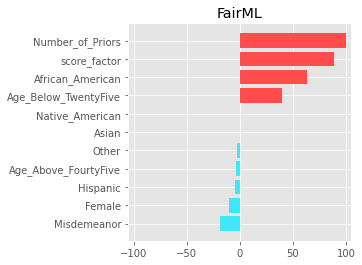

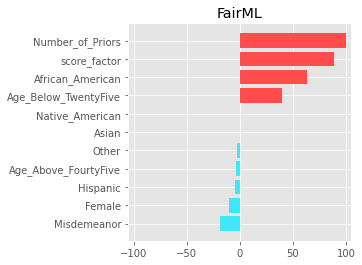

In [54]:
plot_dependencies(
    importancies.median(), 
    reverse_values = False,
    title = 'FairML'
)